# CUSTOMER SEGMENTATION WITH CLUSTERING

In [22]:
import pandas as pd 
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture

%matplotlib inline

In [2]:
data = pd.read_csv('Mall_Customers.csv', sep=',')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Content

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.

Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

### Columns

- CustomerID: Unique ID assigned to the customer
- Gender: Gender of the customer
- Age: Age of the customer
- Anual Income: Anual income of the customer
- Spending Score: Score assigned by the mall based on customer behavior and spending nature

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
def uniques_val_col(df):
    for col in df:
        print(col, data[col].unique(),'\n', sep='\n')

uniques_val_col(df=data)

CustomerID
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]


Gender
['Male' 'Female']


Age
[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 

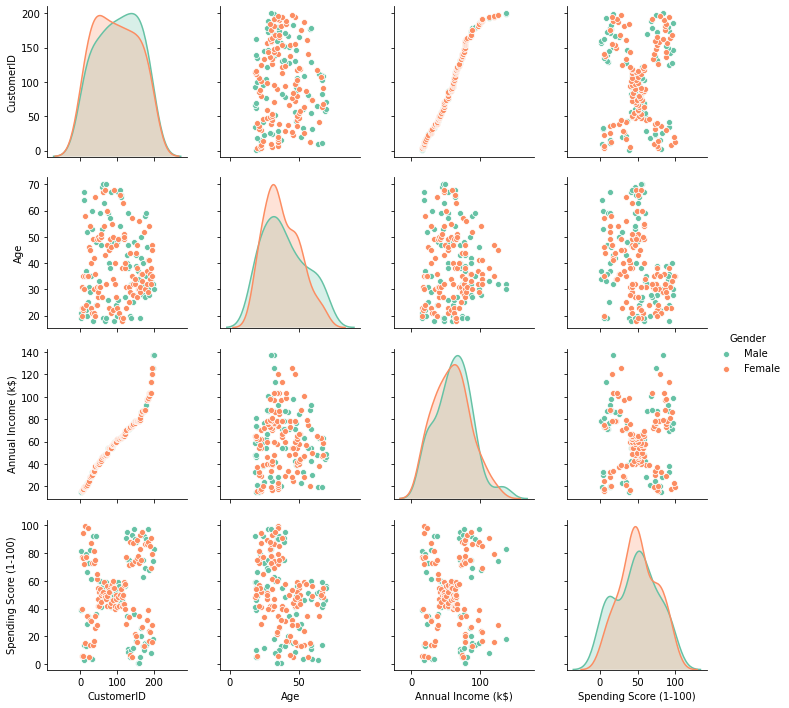

In [6]:
sns.pairplot(data, kind="scatter", hue="Gender", palette="Set2")

At first sight we can see that we are in front of a short dataset, in instances and in features and the main thing watching the features is there isn't a target with feature with labeled instances. So we are going to do clustering techniques to get the customer segmengtation

Any normal distribution????????????????????????

### OUTLIERS

In [7]:
round(data.describe(), 2)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [8]:
data.describe(include='object', exclude='int')

,Gender
count,200
unique,2
top,Female
freq,112


In [9]:
data.Gender.value_counts() # It has an acceptable balanced frequency of the categorical values.

Female    112
Male       88
Name: Gender, dtype: int64

We are going to define as outlier an instance which score is over 3, understanding z-score as the number of tipical deviations about the mean where the instance lies.

In [10]:
data_num = data.select_dtypes(include='int', exclude='object') # We create a subset only with the numerical features for applying the zscore method from numpy.stats. Later this is going to be useful for feature engineering.

z = np.abs(stats.zscore(data_num))

z

array([[1.7234121 , 1.42456879, 1.73899919, 0.43480148],
       [1.70609137, 1.28103541, 1.73899919, 1.19570407],
       [1.68877065, 1.3528021 , 1.70082976, 1.71591298],
       [1.67144992, 1.13750203, 1.70082976, 1.04041783],
       [1.6541292 , 0.56336851, 1.66266033, 0.39597992],
       [1.63680847, 1.20926872, 1.66266033, 1.00159627],
       [1.61948775, 0.27630176, 1.62449091, 1.71591298],
       [1.60216702, 1.13750203, 1.62449091, 1.70038436],
       [1.5848463 , 1.80493225, 1.58632148, 1.83237767],
       [1.56752558, 0.6351352 , 1.58632148, 0.84631002],
       [1.55020485, 2.02023231, 1.58632148, 1.4053405 ],
       [1.53288413, 0.27630176, 1.58632148, 1.89449216],
       [1.5155634 , 1.37433211, 1.54815205, 1.36651894],
       [1.49824268, 1.06573534, 1.54815205, 1.04041783],
       [1.48092195, 0.13276838, 1.54815205, 1.44416206],
       [1.46360123, 1.20926872, 1.54815205, 1.11806095],
       [1.4462805 , 0.27630176, 1.50998262, 0.59008772],
       [1.42895978, 1.3528021 ,

In [11]:
np.where(z >= 3)

(array([], dtype=int64), array([], dtype=int64))

In the upper paragraph we have tried to get the position of the instances (first array is for the number of the row and the second for the column) where we have an instance above the z-score, 3, and as a result we get two empty arrays: There aren't outliers (Considering an outlier an instance with a z-score equal or greater than 3)

### FEATURE ENGINEERING

In [12]:
data_cat = data['Gender'].apply(lambda x: 0 if x == 'Male' else 1) # Was the only categorical column in the dataset, and we are ging only do an apply method from pandas to change the categorical values for binaries.

data_cat = data_cat.to_numpy().reshape(200,1)

In [13]:
std = StandardScaler() # There aren't significant presence of outliers, so to normlaize the distribution we are going to uss standard scaler instead min-max scaling (min-max end up with smaller standard deviations, which can suppress the effect of outliers).

data_num = std.fit_transform(data_num.values.reshape(-1,1))

data_num = data_num.reshape(200,4) # Reshaping the data get the same distribution of instances per row and columns as original num_data panda"""

In [14]:
pre_data = pd.DataFrame(data=data_num, columns=['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

pre_data['Gender'] = data_cat

del pre_data['CustomerID']

pre_data.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.037864,-1.133240,-0.560987,0
1,-0.990176,-1.133240,0.440456,0
2,-1.014020,-1.109396,-1.347834,1
3,-0.942489,-1.109396,0.345080,1
4,-0.751738,-1.085552,-0.537143,1


### CLUSTERING

K-Means

Let's see how perform the Kmeans with this dataset changing the number of the clustera that we take and the number of times (n_init) that the algorythm initilize the centroids. We are going to take the 'full' algorythm because we are working with a small dataset in a low dimensinality space so we can compute all the distances of the instances to get the centroids.

Let's going to create to loop the to see how perform, measured by the inertia, the model changing as we say n_init and n_clusters:

In [15]:
def inertia_per_K(k,n):
    for k in range(1,k+1):
        for n in range(1,n+1):
            inertia = round(KMeans(n_init=n, algorithm='full', n_clusters=k).fit(pre_data).inertia_, 2)
            if k >= 1:
                print('{}_cluster/s , init_{} = '.format(k+1, n), inertia, '\n') 

inertia_per_k_n(k=9,n=5)

NameError: name 'inertia_per_k_n' is not defined

In [173]:
def inertia_diminishing_returns_per_k(k, X):
    ines = []
    for k in range(1,k+1):
            inertia = round(KMeans(n_clusters=k).fit(X).inertia_, 2)
            ines.append(inertia)
                
    for i in range(1, len(ines)):
        dr = round(ines[i] - ines[i-1], 2)
        print('k = {} --- i = {} --- dr = {} '.format(i+1, ines[i], -dr))
                
    return ines 
    
inertia_diminishing_returns_per_k(k=10,X=pre_data)

k = 2 --- i = 170.28 --- dr = 54.57 
k = 3 --- i = 130.34 --- dr = 39.94 
k = 4 --- i = 100.32 --- dr = 30.02 
k = 5 --- i = 82.77 --- dr = 17.55 
k = 6 --- i = 70.87 --- dr = 11.9 
k = 7 --- i = 61.13 --- dr = 9.74 
k = 8 --- i = 54.74 --- dr = 6.39 
k = 9 --- i = 45.96 --- dr = 8.78 
k = 10 --- i = 41.05 --- dr = 4.91 


[224.85, 170.28, 130.34, 100.32, 82.77, 70.87, 61.13, 54.74, 45.96, 41.05]

INERTIA BY CLUSTERS

The firs step is plot the inertia by number of clusters:

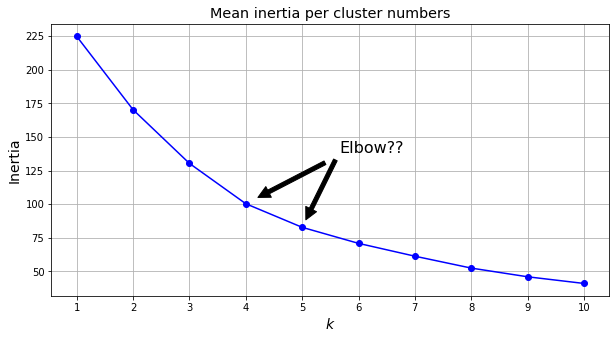

In [174]:
def k_vs_inertia (X, k):

    kmeans_per_k = [KMeans(n_clusters=k).fit(X)
                    for k in range(1, k+1)]
                
    inertias = [model.inertia_ for model in kmeans_per_k]

    plt.figure(figsize=(10, 5))
    plt.title('Mean inertia per cluster numbers', size='x-large')
    plt.grid(axis='both')
    plt.plot(range(1, k+1), inertias, "bo-")
    plt.xlabel("$k$", fontsize=14)
    plt.ylabel("Inertia", fontsize=14)
    plt.xticks(np.arange(1, k+1, step=1))
    plt.annotate('Elbow??',
                 xy=(4, inertias[3]),
                 xytext=(0.55, 0.55),
                 textcoords='figure fraction',
                 fontsize=16,
                 arrowprops=dict(facecolor='black', shrink=0.13)
                 )
    plt.annotate('',
                 xy=(5, inertias[4]),
                 xytext=(0.55, 0.55),
                 textcoords='figure fraction',
                 fontsize=16,
                 arrowprops=dict(facecolor='black', shrink=0.1)
                 )
    
    plt.show()

k_vs_inertia (X=pre_data, k=10)

In the 'Inertia by clusters' graph we can see that seems that 2 clusters...

SIILHOUETTE SCORE BY CLUSTER

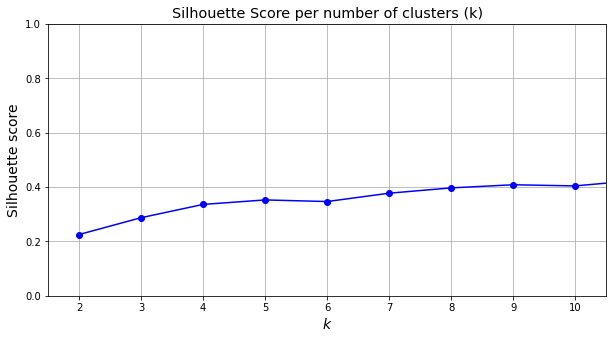

In [175]:
def plot_silhouette_scores(X, k):

    kmeans_per_k = [KMeans(n_clusters=k).fit(X)
                    for k in range(1, k+2)]

    inertias = [model.inertia_ for model in kmeans_per_k]
    
    silhouette_scores = [silhouette_score(X, model.labels_) 
                         for model in kmeans_per_k[1:]]

    plt.figure(figsize=(10, 5))
    plt.grid(axis='both')
    plt.title('Silhouette Score per number of clusters (k)', size='x-large')
    plt.plot(range(2, k+2), silhouette_scores, "bo-")
    plt.xlabel("$k$", fontsize=14)
    plt.ylabel("Silhouette score", fontsize=14)
    plt.axis([1.5, k+0.5, 0, 1])

    plt.show()
    

plot_silhouette_scores(X=pre_data, k=10)

SILHOUETTE DIAGRAM

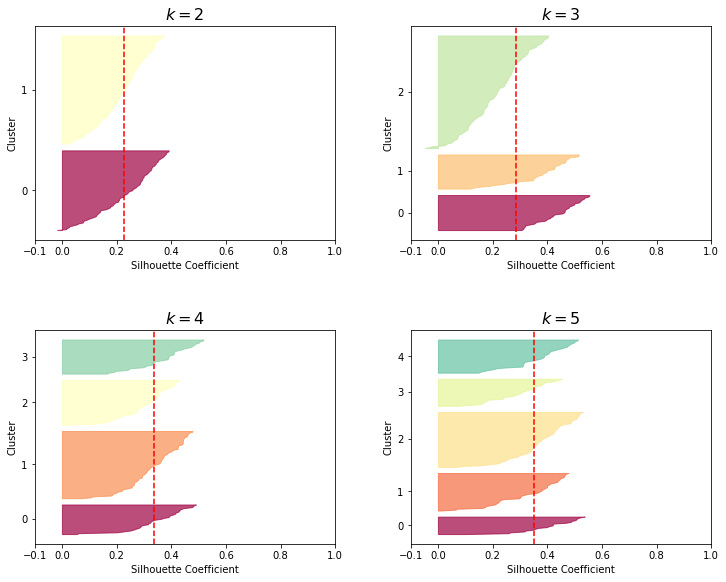

In [176]:
kmeans_per_k = [KMeans(n_clusters=k).fit(pre_data)
                    for k in range(1, 10)]

silhouette_scores = [silhouette_score(pre_data, model.labels_) 
                         for model in kmeans_per_k[1:]]

plt.figure(figsize=(11, 9))

plt.tight_layout(pad=5.0)

for k in (2, 3, 4, 5):
    plt.tight_layout(pad=4.0)
    plt.subplot(2, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(pre_data, y_pred)

    padding = len(pre_data) // 30
    pos = padding
    ticks = []

    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    
    if k in (1, 2):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
        plt.ylabel("Cluster")
    
    if k in (3, 4):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
        plt.ylabel("Cluster")

    else:
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
        plt.ylabel("Cluster")
         
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

We could observe that 2 clusters will be the best approach for this clusterssuterization problem, but there is somethong wrong: Even choosing 2 clusters we can see that the silhouette score (That is the mean for all the silhouette coefficient for all the instances in te dataset) is low.

With 2 clusters we get best silhouette score, about a little bit over 0.4, and this means that the mean distance of the instances from his centroid it's not too cloose (far from 1) but not close too to a cluster boundarie.

In [177]:
kmeans_opt_a = KMeans(n_init=4, n_clusters=5, algorithm='full')

data['Customer type'] = kmeans_opt_a.fit_predict(pre_data)

round(data.groupby(by=['Customer type']).mean(), 2)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Customer type,,,,
0,70.65,45.74,48.19,44.12
1,74.95,41.36,49.83,42.50
2,165.67,41.21,89.03,16.21
3,22.86,24.81,25.62,80.24
4,162.00,32.69,86.54,82.13


In [178]:
kmeans_opt_b = KMeans(n_init=4, n_clusters=4, algorithm='full')

data['Customer type'] = kmeans_opt_b.fit_predict(pre_data)

round(data.groupby(by=['Customer type']).mean(), 2)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Customer type,,,,
0,162.95,40.32,87.43,18.19
1,162.00,32.69,86.54,82.13
2,62.07,38.99,44.19,49.71
3,63.18,42.29,44.63,49.71


In [179]:
kmeans_opt_b = KMeans(n_init=1, n_clusters=5, algorithm='full')

data['Customer type'] = kmeans_opt_b.fit_predict(pre_data)

round(data.groupby(by=['Customer type']).mean(), 2)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Customer type,,,,
0,164.39,32.39,87.78,82.78
1,73.97,37.37,49.37,55.29
2,164.43,41.69,88.23,17.29
3,74.56,40.80,49.71,57.38
4,22.09,45.09,25.73,20.23


In [180]:
data['Customer type'].value_counts().sort_values(ascending=False)

1    62
3    45
0    36
2    35
4    22
Name: Customer type, dtype: int64

In [181]:
kmeans_opt_c = KMeans(n_init=1, n_clusters=4, algorithm='full')

data['Customer type'] = kmeans_opt_c.fit_predict(pre_data)

round(data.groupby(by=['Customer type']).mean().sort_values(by='Spending Score (1-100)'), 2)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Customer type,,,,
3,165.53,41.65,88.74,16.76
2,64.89,38.45,45.32,49.11
1,63.18,42.29,44.63,49.71
0,162.00,32.69,86.54,82.13


In [182]:
data['Customer type'].value_counts().sort_values(ascending=False)

2    76
1    51
0    39
3    34
Name: Customer type, dtype: int64

DBSCAN

In [19]:
dbscan = DBSCAN(eps=0.5, algorithm='auto', min_samples=5)

dbscan.fit(pre_data)

dbscan.labels_

array([-1,  0, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  0,  1,
        0,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1,  1, -1,  1, -1,  0,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  0,  1,  1,  0,  0,  1,  1,
        0,  1,  0,  1,  1,  1,  0,  0,  1,  0,  1,  1,  0,  0,  0,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  1,  1,
        0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,
        1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  0,  1,  1,  0,  0,  0,  1,
        1,  1,  1,  0,  1,  0,  1,  1,  1,  0,  1,  0,  1,  0,  1,  1,  0,
        0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  0,  1,
        0,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1])

In [184]:
dbscan.components_

array([[-0.9901763 , -1.13323952,  0.44045588,  0.        ],
       [-0.94248856, -1.10939565,  0.34508041,  1.        ],
       [-0.96633243, -1.08555178,  0.32123654,  1.        ],
       [-0.94248856, -1.06170791,  0.75042619,  1.        ],
       [-0.77558147, -1.03786404,  0.22586106,  1.        ],
       [-0.91864469, -1.01402017,  0.34508041,  1.        ],
       [-0.96633243, -1.01402017,  0.39276814,  0.        ],
       [-0.65636213, -0.9901763 , -0.65636213,  1.        ],
       [-1.01402017, -0.9901763 ,  0.08279784,  0.        ],
       [-0.89480082, -0.91864469,  0.24970493,  0.        ],
       [-0.39407956, -0.89480082, -1.37167822,  1.        ],
       [-0.7517376 , -0.89480082,  0.24970493,  0.        ],
       [-0.2033286 , -0.82326921, -1.15708339,  1.        ],
       [-0.79942534, -0.82326921,  0.46429975,  0.        ],
       [-0.41792343, -0.82326921, -0.72789373,  1.        ],
       [-0.65636213, -0.82326921, -0.03642151,  0.        ],
       [-0.53714278, -0.

# Bayesian Gaussian Mixture Model

In [51]:
def bgm_clusters_weight(c, i, X):

   for j in range(2,c+1):
        bgm = BayesianGaussianMixture(n_components=j, n_init=i).fit(X)
        print('clusters = {} --> '.format(j), np.round(gm.weights_, 2), '\n')
        
gm_components(c=20, i=10, X=pre_data)

clusters = 10 -->  [0.44 0.56] 

clusters = 10 -->  [0.25 0.56 0.19] 

clusters = 10 -->  [0.01 0.42 0.56 0.01] 

clusters = 10 -->  [0.16 0.08 0.2  0.31 0.24] 

clusters = 10 -->  [0.4  0.15 0.   0.35 0.09 0.01] 

clusters = 10 -->  [0.02 0.45 0.2  0.21 0.01 0.01 0.1 ] 

clusters = 10 -->  [0.09 0.   0.11 0.24 0.15 0.16 0.01 0.24] 

clusters = 10 -->  [0.05 0.11 0.1  0.12 0.11 0.2  0.15 0.15 0.01] 

clusters = 10 -->  [0.17 0.11 0.09 0.11 0.15 0.11 0.   0.07 0.12 0.06] 

clusters = 10 -->  [0.12 0.01 0.1  0.23 0.08 0.12 0.09 0.02 0.14 0.01 0.06] 

clusters = 10 -->  [0.25 0.07 0.12 0.08 0.09 0.04 0.11 0.07 0.06 0.04 0.06 0.01] 

clusters = 10 -->  [0.12 0.1  0.09 0.08 0.16 0.09 0.01 0.07 0.02 0.1  0.04 0.07 0.04] 

clusters = 10 -->  [0.1  0.06 0.24 0.01 0.07 0.12 0.04 0.07 0.04 0.01 0.08 0.08 0.04 0.04] 

clusters = 10 -->  [0.06 0.06 0.16 0.06 0.11 0.06 0.09 0.08 0.04 0.04 0.07 0.01 0.03 0.11
 0.01] 

clusters = 10 -->  [0.01 0.08 0.09 0.06 0.08 0.05 0.06 0.01 0.07 0.12 0.05 0.03 0.